In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '한글 제목')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_te

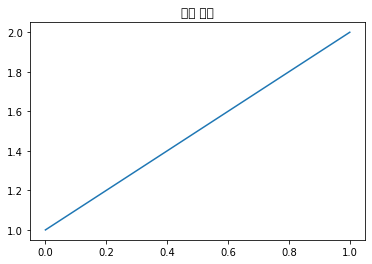

In [ ]:
plt.plot([1,2])
plt.title("한글 제목")

In [ ]:
import re
import os
import unicodedata
import urllib3
import zipfile
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download the data


In [ ]:
!gdown --id 1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis
To: /content/1_구어체(1).xlsx
100% 15.8M/15.8M [00:00<00:00, 107MB/s] 


In [ ]:
import pandas as pd

df = pd.read_excel('/content/1_구어체(1).xlsx')
df

SID                                                 원문  \
0            1  'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...   
1            2                                       씨티은행에서 일하세요?   
2            3              푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.   
3            4   11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.   
4            5     6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.   
...        ...                                                ...   
199995  199996                               나는 먼저 청소기로 바닥을 밀었어요.   
199996  199997                             나는 먼저 팀 과제를 하고 놀러 갔어요.   
199997  199998                              나는 비 같은 멋진 연예인을 좋아해요.   
199998  199999                           나는 멋진 자연 경치를 보고 눈물을 흘렸어.   
199999  200000                               나는 멋진 중학교 생활을 기대합니다.   

                                                      번역문  
0       Bible Coloring' is a coloring application that...  
1                             Do you work at a City bank?  
2       PURITO's bestseller, which recorded 4th rough ...  
3       In Chapter 11 Jesus called Lazarus from the to...  
4       I would feel grateful to know how many stocks ...  
...                                                   ...  
199995                First of all, I vacuumed the floor.  
199996  I did the team assignment first and went out t...  
199997                 I like cool entertainer like Rain.  
199998                I cried seeing the amazing scenery.  
199999  I look forward to a great middle school experi...  

[200000 rows x 3 columns]

# Prepare the data

In [ ]:
def kor_preprocess(sent):
  sent = re.sub(r"([?.!,¿])", r" \1", sent)
  sent = re.sub(r"[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣!.?]+", r" ", sent)
  sent = re.sub(r"\s+", " ", sent)
  return sent

def eng_preprocess(sent):
  sent = re.sub(r"([?.!,¿])", r" \1", sent)
  sent = re.sub(r"[^0-9a-zA-Z!.?]+", r" ", sent)
  sent = re.sub(r"\s+", " ", sent)
  return sent

In [ ]:
kor_preprocess(df['원문'][0])

' Bible Coloring 은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다 .'

In [ ]:
eng_preprocess(df['번역문'][0])

'Bible Coloring is a coloring application that allows you to experience beautiful stories in the Bible .'

In [ ]:
src_line = []

for sent in df['원문']:
  src_line.append(kor_preprocess(sent))

src_line

[' Bible Coloring 은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다 .',
 '씨티은행에서 일하세요 ?',
 '푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다 .',
 '11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다 .',
 '6 .5 7 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다 .',
 'F W 겐조타이거 키즈와 그리고 이번에 주문한 키즈 중 부족한 수량에 대한 환불입니다 .',
 '강아지들과 내 사진을 보낼게 .',
 '그 수익금 중 일부를 위안부 할머니들을 위해 쓰고 그들을 위해 여러 가지 캠페인을 벌이고 있습니다 .',
 '그들은 내가 잘하는 것을 바탕으로 별명을 사용하고 있기 때문에 나는 사람들이 치타라고 불러주면 기분이 좋아 .',
 '그러므로 실제로 컴퓨터 프로그램을 만든 사람이 프로그램에 대한 저작자가 돼요 .',
 '나는 친구에게 그 철학자의 책을 선물해 주겠다고 말했습니다 .',
 '나머지 사진은 내 친구들이야 .',
 '나머지 시간에는 공부해요 .',
 '네가 하는 일과 공부 잘하길 멀리서 응원할게 .',
 '다른 선수들이 몬스터를 사냥할 경우 당신은 추가 경험치를 획득해요 .',
 '당신에게 영화관 티켓을 그냥 보여 주면 되나요 ?',
 '마치 목욕탕 창구처럼 보일까말까 한 작은 구멍으로 내가 돈을 주면 그 여자가 교통카드를 충전시켜주었던 기억이 납니다 .',
 '문화뿐만 아니라 그 나라만의 독특한 사회 전체의 유기적 관계를 알 수 있습니다 .',
 '얼마 전 가진 A사와의 회의 결과 본계약의 계약 시점은 약간 지연된다고 합니다 .',
 '에어비앤비 투어 서비스를 운영자의 프로필 사진을 촬영하고 이야기를 정리해 사이트에 소개하려해요 .',
 '이 제품을 사용할 때 예기치 않은 추락의 경우를 고려하면 안전을 생각하여 잔디밭이 필요합니다 .',
 '익스프레스 수분 마스크는 생기와 활력을 불어넣어 빛나는 피부를 선사해줘요 .',
 '저

In [ ]:
!pip install konlpy
from konlpy.tag import Okt,Mecab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.1 MB/s 
     |████████████████████████████████| 453 kB 64.3 MB/s 


In [ ]:
tokenizer = Okt() 
sents_kor_in = [tokenizer.morphs(sent) for sent in src_line]
sents_kor_in

[['Bible',
  'Coloring',
  '은',
  '성경',
  '의',
  '아름다운',
  '이야기',
  '를',
  '체험',
  '할',
  '수',
  '있는',
  '컬러링',
  '앱',
  '입니다',
  '.'],
 ['씨티', '은행', '에서', '일', '하세요', '?'],
 ['푸리',
  '토의',
  '베스트셀러',
  '는',
  '해외',
  '에서',
  '입',
  '소문',
  '만으로',
  '4',
  '차',
  '완판',
  '을',
  '기록',
  '하였다',
  '.'],
 ['11',
  '장',
  '에서는',
  '예수님',
  '이',
  '이번',
  '엔',
  '나사',
  '로',
  '를',
  '무덤',
  '에서',
  '불러내어',
  '죽은',
  '자',
  '가운데',
  '서',
  '살리셨습니다',
  '.'],
 ['6',
  '.',
  '5',
  '7',
  '8',
  '사이즈',
  '가',
  '몇',
  '개',
  '나',
  '더',
  '재',
  '입고',
  '될지',
  '제',
  '게',
  '알려주시면',
  '감사하겠습니다',
  '.'],
 ['F',
  'W',
  '겐조',
  '타이거',
  '키즈',
  '와',
  '그리고',
  '이번',
  '에',
  '주문',
  '한',
  '키즈',
  '중',
  '부족한',
  '수량',
  '에',
  '대한',
  '환불',
  '입니다',
  '.'],
 ['강아지', '들', '과', '내', '사진', '을', '보낼게', '.'],
 ['그',
  '수익금',
  '중',
  '일부',
  '를',
  '위안부',
  '할머니',
  '들',
  '을',
  '위해',
  '쓰고',
  '그',
  '들',
  '을',
  '위해',
  '여러',
  '가지',
  '캠페인',
  '을',
  '벌이',
  '고',
  '있습니다',
  '.'],
 ['그',
  '들

In [ ]:
sents_en_in, sents_en_out = [], []
for word in df['번역문']:
  tar_line = eng_preprocess(word)
  sents_en_in.append([w for w in ('<sos> ' + tar_line).split()])
  sents_en_out.append([w for w in (tar_line + ' <eos>').split()])
sents_en_in[:10], sents_en_out[:10]

([['<sos>',
   'Bible',
   'Coloring',
   'is',
   'a',
   'coloring',
   'application',
   'that',
   'allows',
   'you',
   'to',
   'experience',
   'beautiful',
   'stories',
   'in',
   'the',
   'Bible',
   '.'],
  ['<sos>', 'Do', 'you', 'work', 'at', 'a', 'City', 'bank', '?'],
  ['<sos>',
   'PURITO',
   's',
   'bestseller',
   'which',
   'recorded',
   '4th',
   'rough',
   'cuts',
   'by',
   'words',
   'of',
   'mouth',
   'from',
   'abroad',
   '.'],
  ['<sos>',
   'In',
   'Chapter',
   '11',
   'Jesus',
   'called',
   'Lazarus',
   'from',
   'the',
   'tomb',
   'and',
   'raised',
   'him',
   'from',
   'the',
   'dead',
   '.'],
  ['<sos>',
   'I',
   'would',
   'feel',
   'grateful',
   'to',
   'know',
   'how',
   'many',
   'stocks',
   'will',
   'be',
   'secured',
   'of',
   'size',
   '6',
   '.5',
   '7',
   'and',
   '8',
   '.'],
  ['<sos>',
   '18fw',
   'Kenzo',
   'Tiger',
   'Kids',
   'and',
   'refund',
   'for',
   'lacking',
   'quantity',
   

In [ ]:
tokenizer_kor = Tokenizer()
tokenizer_kor.fit_on_texts(sents_kor_in)
word_vocab = tokenizer_kor.word_index
word_vocab

{'.': 1,
 '을': 2,
 '이': 3,
 '는': 4,
 '에': 5,
 '가': 6,
 '를': 7,
 '의': 8,
 '은': 9,
 '나': 10,
 '?': 11,
 '것': 12,
 '당신': 13,
 '그': 14,
 '들': 15,
 '우리': 16,
 '수': 17,
 '에서': 18,
 '으로': 19,
 '내': 20,
 '저': 21,
 '입니다': 22,
 '할': 23,
 '한': 24,
 '로': 25,
 '과': 26,
 '해': 27,
 '하는': 28,
 '하고': 29,
 '합니다': 30,
 '있습니다': 31,
 '에게': 32,
 '와': 33,
 '도': 34,
 '적': 35,
 '사람': 36,
 '요': 37,
 '이에요': 38,
 '생각': 39,
 '너': 40,
 '있는': 41,
 '때': 42,
 '오늘': 43,
 '고': 44,
 '잘': 45,
 '거': 46,
 '인': 47,
 '말': 48,
 '그녀': 49,
 '했어요': 50,
 '때문': 51,
 '일': 52,
 '더': 53,
 '있어요': 54,
 '못': 55,
 '친구': 56,
 '안': 57,
 '네': 58,
 '시간': 59,
 '했습니다': 60,
 '에는': 61,
 '하지': 62,
 '한국': 63,
 '위해': 64,
 '서': 65,
 '제품': 66,
 '제': 67,
 '사용': 68,
 '곳': 69,
 '해요': 70,
 '된': 71,
 '게': 72,
 '많이': 73,
 '중': 74,
 '만': 75,
 '있어': 76,
 '가지': 77,
 '까지': 78,
 '많은': 79,
 '그것': 80,
 '집': 81,
 '해서': 82,
 '다': 83,
 '대해': 84,
 '난': 85,
 '확인': 86,
 '해야': 87,
 '다른': 88,
 '너무': 89,
 '예요': 90,
 '하여': 91,
 '알': 92,
 '가장': 93,
 '지금': 94,
 '주': 95,
 '전':

In [ ]:
len(word_vocab)

71561

In [ ]:
encoder_input = tokenizer_kor.texts_to_sequences(sents_kor_in)
encoder_input

[[37901, 37902, 9, 3800, 8, 750, 188, 7, 1359, 23, 17, 41, 27804, 914, 22, 1],
 [10094, 635, 18, 52, 222, 11],
 [37903,
  8400,
  13990,
  4,
  1056,
  18,
  397,
  3642,
  3696,
  344,
  336,
  37904,
  2,
  1295,
  9159,
  1],
 [2460,
  493,
  225,
  3388,
  3,
  108,
  357,
  7020,
  25,
  7,
  7481,
  18,
  37905,
  3859,
  276,
  2582,
  65,
  37906,
  1],
 [687,
  1,
  376,
  1010,
  1078,
  725,
  6,
  181,
  127,
  10,
  53,
  974,
  860,
  3860,
  67,
  72,
  2004,
  1338,
  1],
 [2725,
  3742,
  19400,
  22647,
  4152,
  33,
  99,
  108,
  5,
  176,
  24,
  4152,
  74,
  1928,
  530,
  5,
  113,
  798,
  22,
  1],
 [799, 15, 26, 20, 97, 2, 5748, 1],
 [14,
  12931,
  74,
  1202,
  7,
  5472,
  1250,
  15,
  2,
  64,
  1371,
  14,
  15,
  2,
  64,
  254,
  77,
  4362,
  2,
  8770,
  44,
  31,
  1],
 [14,
  15,
  9,
  20,
  6,
  45,
  28,
  12,
  2,
  1580,
  19,
  5885,
  2,
  68,
  29,
  630,
  51,
  5,
  10,
  4,
  36,
  15,
  3,
  22648,
  207,
  37907,
  351,
  3,
  638,
  

## gdownsents_kor_in&sents_en_in&sents_en_out

In [ ]:
!gdown —id 16SLOsyD-TdW7lINkhDOrpsgGgcOv4xky  #sents kor in
!gdown —id 1KsCjEu3VCQgIrXW_usDuouO6ffnb1JCv #sents en out
!gdown —id 1M1SrRawoyRn2RBTIcOiDCPvSZa-74NnN # sents en in

In [ ]:
import pickle

with open("/content/sents_kor_in.pkl", 'rb') as f:
    sents_kor_in = pickle.load(f)

with open("/content/sents_en_in.pkl", 'rb') as f:
    sents_en_in = pickle.load(f)


with open("/content/sents_en_out.pkl", 'rb') as f:
    sents_en_out = pickle.load(f)



## Tokenizer()

In [ ]:
tokenizer_en = Tokenizer()
tokenizer_en.fit_on_texts(sents_en_in)
tokenizer_en.fit_on_texts(sents_en_out)

decoder_input = tokenizer_en.texts_to_sequences(sents_en_in)
decoder_target = tokenizer_en.texts_to_sequences(sents_en_out)

In [ ]:
encoder_input = pad_sequences(encoder_input, padding='post')
decoder_input = pad_sequences(decoder_input, padding='post')
decoder_target = pad_sequences(decoder_target, padding='post')

In [ ]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (200000, 46)
디코더의 입력의 크기(shape) : (200000, 56)
디코더의 레이블의 크기(shape) : (200000, 56)


In [ ]:
print(tokenizer_en.word_index)
print(tokenizer_kor.word_index)

{'.': 1, 'the': 2, '<sos>': 3, '<eos>': 4, 'i': 5, 'to': 6, 'a': 7, 'you': 8, 'is': 9, 'and': 10, 'of': 11, 'in': 12, 'it': 13, '?': 14, 'for': 15, 'that': 16, 'we': 17, 'my': 18, 'this': 19, 'have': 20, 'with': 21, 'are': 22, 's': 23, 'can': 24, 't': 25, 'on': 26, 'be': 27, 'will': 28, 'me': 29, 'your': 30, 'was': 31, 'if': 32, 'as': 33, 'not': 34, 'do': 35, 'at': 36, 'there': 37, 'so': 38, 'like': 39, 'when': 40, 'from': 41, 'm': 42, 'because': 43, 'time': 44, 'want': 45, 'but': 46, 'by': 47, 'please': 48, 'about': 49, 'he': 50, 'an': 51, 'what': 52, 'go': 53, 'am': 54, 'don': 55, 'has': 56, 'think': 57, 'know': 58, 'after': 59, 'get': 60, 'would': 61, 'our': 62, 'they': 63, 'today': 64, 'all': 65, 'people': 66, 'how': 67, 'she': 68, 'who': 69, 'good': 70, 'one': 71, 'more': 72, 'or': 73, 'up': 74, 'work': 75, 'make': 76, 'also': 77, 'going': 78, 'out': 79, 'should': 80, 'day': 81, 'which': 82, 'now': 83, 'let': 84, 'been': 85, 'korea': 86, 'take': 87, 'just': 88, 'need': 89, 'first'

In [ ]:
src_vocab_size = len(tokenizer_kor.word_index) + 1
tar_vocab_size = len(tokenizer_en.word_index) + 1

print(f"한국어 단어 집합의 크기 : {src_vocab_size}, 영어 단어 집합의 크기 : {tar_vocab_size}")

한국어 단어 집합의 크기 : 71562, 영어 단어 집합의 크기 : 37449


In [ ]:
src_to_index = tokenizer_kor.word_index  # word : idx
index_to_src = tokenizer_kor.index_word  # idx : word
tar_to_index = tokenizer_en.word_index # word : idx
index_to_tar = tokenizer_en.index_word # idx : word

In [ ]:
print(src_to_index)
print(index_to_src)

{'.': 1, '을': 2, '이': 3, '는': 4, '에': 5, '가': 6, '를': 7, '의': 8, '은': 9, '나': 10, '?': 11, '것': 12, '당신': 13, '그': 14, '들': 15, '우리': 16, '수': 17, '에서': 18, '으로': 19, '내': 20, '저': 21, '입니다': 22, '할': 23, '한': 24, '로': 25, '과': 26, '해': 27, '하는': 28, '하고': 29, '합니다': 30, '있습니다': 31, '에게': 32, '와': 33, '도': 34, '적': 35, '사람': 36, '요': 37, '이에요': 38, '생각': 39, '너': 40, '있는': 41, '때': 42, '오늘': 43, '고': 44, '잘': 45, '거': 46, '인': 47, '말': 48, '그녀': 49, '했어요': 50, '때문': 51, '일': 52, '더': 53, '있어요': 54, '못': 55, '친구': 56, '안': 57, '네': 58, '시간': 59, '했습니다': 60, '에는': 61, '하지': 62, '한국': 63, '위해': 64, '서': 65, '제품': 66, '제': 67, '사용': 68, '곳': 69, '해요': 70, '된': 71, '게': 72, '많이': 73, '중': 74, '만': 75, '있어': 76, '가지': 77, '까지': 78, '많은': 79, '그것': 80, '집': 81, '해서': 82, '다': 83, '대해': 84, '난': 85, '확인': 86, '해야': 87, '다른': 88, '너무': 89, '예요': 90, '하여': 91, '알': 92, '가장': 93, '지금': 94, '주': 95, '전': 96, '사진': 97, '후': 98, '그리고': 99, '다음': 100, '좋은': 101, '함께': 102, '위': 103, '문제': 104, '다시': 

In [ ]:
encoder_input.shape[0]

200000

In [ ]:
np.random.seed(7)

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)  # indices : 셔플하기 위한, 문장 개수 베이스의 랜덤한 순서의 인덱스 생성

랜덤 시퀀스 : [191573 109949  71888 ... 185312  81254 123652]


In [ ]:
indices

array([191573, 109949,  71888, ..., 185312,  81254, 123652])

In [ ]:
# 문장 순서 섞기

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [ ]:
decoder_input[indices[0]], decoder_target[indices[0]]

(array([  3,  27, 173,  10, 737, 279,  17, 167,   1,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int32),
 array([ 27, 173,  10, 737, 279,  17, 167,   1,   4,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0], dtype=int32))

`<sos>` `<eos>` 토큰을 제외한 다른 단어들은 동일한 인덱스를 갖고 있어야 합니다. 

10%의 데이터를 test데이터로 분리하겠습니다. 

In [ ]:
num_samples = len(df)

In [ ]:
n_of_val = int(num_samples*0.1)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [ ]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

훈련 source 데이터의 크기 : (180000, 46)
훈련 target 데이터의 크기 : (180000, 56)
훈련 target 레이블의 크기 : (180000, 56)
테스트 source 데이터의 크기 : (20000, 46)
테스트 target 데이터의 크기 : (20000, 56)
테스트 target 레이블의 크기 : (20000, 56)


# Model

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

In [ ]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
hidden_units = 256  # Latent dimensionality of the encoding space.
embedding_dim = 64

In [ ]:
from tensorflow.keras.layers import Input

# 인코더
encoder_inputs = Input(shape=(None, ))

# 임베딩 층
enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs)

# 상태값 리턴을 위해 return_state는 True
encoder_lstm = LSTM(hidden_units, return_state = True)

# 은닉 상태와 셀 상태를 리턴
encoder_outputs, state_h, state_c =  encoder_lstm(enc_emb)

encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장

In [ ]:
# 디코더
decoder_inputs = Input(shape=(None, ))

# 임베딩 층
dec_emb_layer = Embedding(tar_vocab_size, hidden_units)

# 임베딩 결과
dec_emb = dec_emb_layer(decoder_inputs)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state = True)

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = encoder_states)  #c, h를 encoder에서 나온 걸로 쓰겠다

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(tar_vocab_size, activation = 'softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [ ]:
# 모델의 입력과 출력을 정의.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 64)     4579968     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 256)    9586944     ['input_2[0][0]']                
                                                                                              

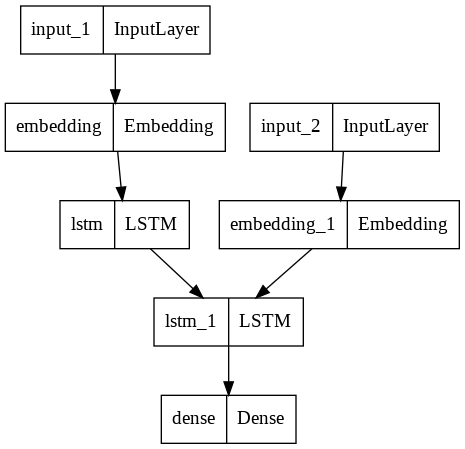

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', )

시각화

In [ ]:
from matplotlib import pyplot as plt

def history_model(model):
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
  history = model
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  return plt.show()

In [ ]:
with tf.device("/GPU:1"):

  history_model(model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=15))

In [ ]:
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=15)

Epoch 1/15
1407/1407 [==============================] - 324s 219ms/step - loss: 1.3658 - acc: 0.8154 - val_loss: 1.0970 - val_acc: 0.8336
Epoch 2/15
1407/1407 [==============================] - 307s 218ms/step - loss: 1.0368 - acc: 0.8383 - val_loss: 0.9865 - val_acc: 0.8436
Epoch 3/15
1407/1407 [==============================] - 307s 218ms/step - loss: 0.9296 - acc: 0.8476 - val_loss: 0.9130 - val_acc: 0.8507
Epoch 4/15
1407/1407 [==============================] - 307s 218ms/step - loss: 0.8472 - acc: 0.8552 - val_loss: 0.8618 - val_acc: 0.8558
Epoch 5/15
1407/1407 [==============================] - 307s 218ms/step - loss: 0.7810 - acc: 0.8613 - val_loss: 0.8298 - val_acc: 0.8593
Epoch 6/15
1407/1407 [==============================] - 306s 218ms/step - loss: 0.7259 - acc: 0.8666 - val_loss: 0.8074 - val_acc: 0.8620
Epoch 7/15
1407/1407 [==============================] - 307s 218ms/step - loss: 0.6780 - acc: 0.8714 - val_loss: 0.7955 - val_acc: 0.8636
Epoch 8/15
1407/1407 [============

### 최종 번역기 만들기

In [ ]:
# 인코더 - 훈련과 동일 
encoder_model = Model(encoder_inputs, encoder_states)

In [ ]:
# 디코더 

# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# 모든 시점에 대해서 단어 예측 (Fully Connected)
decoder_outputs2 = decoder_dense(decoder_outputs2)

# 수정된 디코더
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)  # h, c를 매번 직접 전달 ..?..

In [ ]:
target_seq = np.zeros((1,1))
target_seq[0, 0] = tar_to_index['<sos>']

In [ ]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
  states_value = encoder_model.predict(input_seq)  #ht

  # <SOS>에 해당하는 정수 생성
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tar_to_index['<sos>']  # tar_to_index : target word의 index 값 반환

  stop_condition = False
  decoded_sentence = ''

  # stop_condition이 True가 될 때까지 루프 반복
  # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
  while not stop_condition:
    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value)  #target_seq : <sos>

    # 예측 결과를 단어로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 단어를 예측 문장에 추가
    decoded_sentence += ' '+sampled_char

    # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
    if (sampled_char == '<eos>' or len(decoded_sentence) > 50):
        stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c]

  return decoded_sentence

# Evaluate

In [ ]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_src[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != tar_to_index['<sos>'] and encoded_word != tar_to_index['<eos>']):
      sentence = sentence + index_to_tar[encoded_word] + ' '
  return sentence

In [ ]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_train[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("입력문장 :",seq_to_src(encoder_input_train[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_train[seq_index]))
  print("번역문장 :",decoded_sentence[1:-5])
  print("-"*50)

입력문장 : 인도네시아 에서 만날 수 있기를 바랍니다 . 
정답문장 : i hope i can see you in indonesia . 
번역문장 : i hope you can meet at the country . 
--------------------------------------------------
입력문장 : 나 는 요즘 일만 하고 살 아 . 
정답문장 : i only work nowadays . 
번역문장 : i am doing these days so i am doing everything . 
--------------------------------------------------
입력문장 : 오늘 나 는 집 을 한 채 샀습니다 . 
정답문장 : today i bought a house . 
번역문장 : today i bought a house . 
--------------------------------------------------
입력문장 : 당신 의 문의 하신 내용 에 회신 드리니 참조 하세요 . 
정답문장 : i m replying to your inquiry so check it out . 
번역문장 : i am sending you the answers regarding the colo
--------------------------------------------------
입력문장 : 왜냐하면 내 가 혼자 아이 를 낳고 키우는 동안 주변 에서 걱정 하고 격려 해주며 함께 울 고 웃어 주었던 이 들 이 있었기 때문 이에요 . 
정답문장 : because there have been those who cried and laughed together worried and encouraged around me while i was giving birth and raising a child alone . 
번역문장 : because i felt like a child who was drunk and i
----------------

In [ ]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_test[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("입력문장 :",seq_to_src(encoder_input_test[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_test[seq_index]))
  print("번역문장 :",decoded_sentence[1:-5])
  print("-"*50)

입력문장 : 예 저 는 주사 맞는 것 을 싫어합니다 . 
정답문장 : yes i don t like to get shots . 
번역문장 : i hate the water of the age for free . 
--------------------------------------------------
입력문장 : 네 맥주 캔 에 닭 을 꽂아서 굽는 비어 캔 치킨 이라고 해 요 . 
정답문장 : yeah it s called beer can chicken where you stick chicken into beer cans and cook it . 
번역문장 : yes you can eat chicken soup or beer which can
--------------------------------------------------
입력문장 : 나 는 베네수엘라 썬 타이거 를 키웁니다 . 
정답문장 : i raise venezuela s sun tiger . 
번역문장 : i suffer from indigestion . 
--------------------------------------------------
입력문장 : 이제 부터는 친하게 지내자고 그녀 에게 말 해 줘 . 
정답문장 : please let her know that i would like to get close with her from now on . 
번역문장 : now let s talk about the side of the future . 
--------------------------------------------------
입력문장 : 어제 의 관점 과 다른 관점 으로 세상 을 봐도 됩니다 . 
정답문장 : i can look upon the world with a different view compare to yesterday s . 
번역문장 : i can see the difference between the two and k
-----------------------

## BLEU Score (Bilingual Evaluation Understudy Score)
기계 번역의 성능이 얼마나 뛰어난가를 측정하기 위해 사용되는 대표적인 방법 중 하나인 BLEU(Bilingual Evaluation Understudy)를 측정해봅시다. 
- 논문 : BLEU: a Method for Automatic Evaluation of Machine Translation
- BLEU 점수는 기계 번역된 텍스트와 고품질 참조 번역 세트의 유사성을 측정하는 0과 1 사이의 숫자입니다. 
    - 값이 0이면 기계 번역된 출력이 참조 번역과 겹치는 부분이 없는 것을 의미하고(저품질)
    - 1이면 참조 번역과 완벽하게 겹치는 것을 의미합니다(고품질)

- BLEU 설명 
    - https://jrc-park.tistory.com/273
    - https://wikidocs.net/31695
    - https://cloud.google.com/translate/automl/docs/evaluate?hl=ko#bleu

In [ ]:
import numpy as np
from collections import Counter
from nltk import ngrams

BLEU는 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법입니다. 

In [ ]:
import nltk.translate.bleu_score as bleu

candidate = 'It is a guide to action which ensures that the military always obeys the commands of the party'
references = [
    'It is a guide to action that ensures that the military will forever heed Party commands',
    'It is the guiding principle which guarantees the military forces always being under the command of the Party',
    'It is the practical guide for the army always to heed the directions of the party'
]

print('패키지 NLTK의 BLEU :',bleu.sentence_bleu(list(map(lambda ref: ref.split(), references)),candidate.split()))

패키지 NLTK의 BLEU : 0.5045666840058485


In [ ]:
ref_train = [seq_to_tar(sen) for sen in decoder_input_train[:100]]

In [ ]:
from tqdm.notebook import tqdm 

pred_train = []
for idx in tqdm(range(len(encoder_input_train[:100]))):
    pred_train.append(decode_sequence(encoder_input_train[idx:idx+1]))

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
bleu_score = 0
for ref, pred in zip(ref_train, pred_train):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_train)
bleu_score

In [ ]:
ref_test = [seq_to_tar(sen) for sen in decoder_input_test[:100]]
pred_test = [decode_sequence(encoder_input_test[idx:idx+1]) for idx in tqdm(range(len(encoder_input_test[:100])))]

bleu_score = 0
for ref, pred in zip(ref_test, pred_test):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_test)
bleu_score

### Reference

- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
- https://wikidocs.net/86900